In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import tensorflow_federated as tff

In [2]:
import os
import sys
stderr = sys.stderr
sys.stderr = open(os.devnull, 'w')
import keras
sys.stderr = stderr
    
import tensorflow as tf


from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger

import argparse
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import keras.metrics
from keras.optimizers import Adam, RMSprop
import numpy as np


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

from sklearn.metrics import auc
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2




import numpy, scipy.io
import torch
import torchvision.models as models


In [3]:
img = image.load_img("Dataset1/training/covid/COVID-100.png")

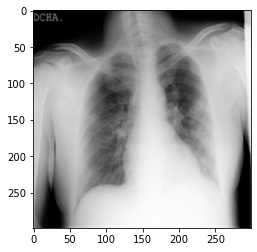

In [4]:
plt.imshow(img)

In [5]:
cv2.imread("Dataset1/training/covid/COVID-1.png")

array([[[185, 185, 185],
        [ 40,  40,  40],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [ 24,  24,  24],
        [131, 131, 131]],

       [[ 75,  75,  75],
        [ 14,  14,  14],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  8,   8,   8],
        [ 42,  42,  42]],

       [[ 11,  11,  11],
        [  2,   2,   2],
        [  0,   0,   0],
        ...,
        [  1,   1,   1],
        [  3,   3,   3],
        [ 12,  12,  12]],

       ...,

       [[ 78,  78,  78],
        [ 62,  62,  62],
        [ 68,  68,  68],
        ...,
        [  3,   3,   3],
        [ 13,  13,  13],
        [ 27,  27,  27]],

       [[104, 104, 104],
        [ 74,  74,  74],
        [ 75,  75,  75],
        ...,
        [  1,   1,   1],
        [ 23,  23,  23],
        [ 83,  83,  83]],

       [[156, 156, 156],
        [ 90,  90,  90],
        [ 78,  78,  78],
        ...,
        [  1,   1,   1],
        [ 45,  45,  45],
        [167, 167, 167]]

In [6]:
cv2.imread("Dataset1/training/covid/COVID-1.png").shape

(299, 299, 3)

In [7]:
train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [8]:
train_dataset = train.flow_from_directory('Dataset/training/',
                                         target_size = (299,299),
                                         batch_size = 20,
                                         class_mode = 'categorical')

test_dataset = train.flow_from_directory('Dataset/testing/',
                                         target_size = (299,299),
                                         batch_size = 20,
                                         class_mode = 'categorical')

validation_dataset = train.flow_from_directory('Dataset/validation/',
                                         target_size = (299,299),
                                         batch_size = 10,
                                         class_mode = 'categorical')

Found 1500 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [9]:
validation_dataset.class_indices

{'covid': 0, 'normal': 1, 'pneumonia': 2}

In [10]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (299,299,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(3,activation = 'softmax')
                                   ])

In [12]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(lr = 0.001),
             metrics = ['accuracy'])

In [13]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 5,
                     epochs = 20,
                     validation_data = validation_dataset)

Epoch 1/20
5/5 [==============================] - 2s 413ms/step - loss: 4.7105 - accuracy: 0.3700 - val_loss: 1.0988 - val_accuracy: 0.3400
Epoch 2/20
5/5 [==============================] - 2s 338ms/step - loss: 1.0577 - accuracy: 0.3300 - val_loss: 0.8766 - val_accuracy: 0.8167
Epoch 3/20
5/5 [==============================] - 2s 336ms/step - loss: 1.0421 - accuracy: 0.6200 - val_loss: 1.9727 - val_accuracy: 0.3333
Epoch 4/20
5/5 [==============================] - 2s 339ms/step - loss: 1.1117 - accuracy: 0.4400 - val_loss: 0.7290 - val_accuracy: 0.7133
Epoch 5/20
5/5 [==============================] - 2s 340ms/step - loss: 0.8338 - accuracy: 0.7400 - val_loss: 0.7834 - val_accuracy: 0.6267
Epoch 6/20
5/5 [==============================] - 2s 338ms/step - loss: 0.6541 - accuracy: 0.7400 - val_loss: 0.5053 - val_accuracy: 0.8267
Epoch 7/20
5/5 [==============================] - 2s 339ms/step - loss: 0.4545 - accuracy: 0.8100 - val_loss: 0.4765 - val_accuracy: 0.8333
Epoch 8/20
5/5 [====

In [14]:
weight = model.get_weights()

In [15]:
train_dataset1 = train.flow_from_directory('Dataset1/training/',
                                         target_size = (299,299),
                                         batch_size = 10,
                                         class_mode = 'categorical')

test_dataset1 = train.flow_from_directory('Dataset1/testing/',
                                         target_size = (299,299),
                                         batch_size = 10,
                                         class_mode = 'categorical')

validation_dataset1 = train.flow_from_directory('Dataset1/validation/',
                                         target_size = (299,299),
                                         batch_size = 4,
                                         class_mode = 'categorical')


Found 300 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
Found 60 images belonging to 3 classes.


In [16]:
# batchX, batchy = train_dataset.next()
# print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

In [17]:
validation_dataset1.class_indices

{'covid': 0, 'normal': 1, 'pneumonia': 2}

In [18]:
validation_dataset1.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
model1 = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (299,299,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(3,activation = 'softmax')
                                   ])

In [20]:
model1.set_weights(weight)

In [21]:
model1.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(lr = 0.001),
             metrics = ['accuracy'])

In [22]:
model_fit = model1.fit(train_dataset1,
                     steps_per_epoch = 5,
                     epochs = 20,
                     validation_data = validation_dataset1)

Epoch 1/20
5/5 [==============================] - 1s 181ms/step - loss: 1.5743 - accuracy: 0.5000 - val_loss: 0.7779 - val_accuracy: 0.7333
Epoch 2/20
5/5 [==============================] - 1s 134ms/step - loss: 0.6324 - accuracy: 0.7600 - val_loss: 0.7242 - val_accuracy: 0.6833
Epoch 3/20
5/5 [==============================] - 1s 141ms/step - loss: 0.8614 - accuracy: 0.6800 - val_loss: 0.7493 - val_accuracy: 0.7500
Epoch 4/20
5/5 [==============================] - 1s 131ms/step - loss: 0.5518 - accuracy: 0.7200 - val_loss: 0.5100 - val_accuracy: 0.8167
Epoch 5/20
5/5 [==============================] - 1s 129ms/step - loss: 0.9250 - accuracy: 0.7000 - val_loss: 0.7566 - val_accuracy: 0.7667
Epoch 6/20
5/5 [==============================] - 1s 129ms/step - loss: 0.5411 - accuracy: 0.7400 - val_loss: 0.4468 - val_accuracy: 0.8667
Epoch 7/20
5/5 [==============================] - 1s 146ms/step - loss: 0.6736 - accuracy: 0.7400 - val_loss: 0.5332 - val_accuracy: 0.8000
Epoch 8/20
5/5 [====

In [23]:
# model1.summary()

In [24]:
# layer_1 = model.get_layer(name=None, index=1)

In [25]:
weight1 = model1.get_weights()

In [26]:
model.set_weights(weight1)

In [27]:
weight = model.get_weights()

In [28]:
train_dataset2 = train.flow_from_directory('Dataset2/training/',
                                         target_size = (299,299),
                                         batch_size = 10,
                                         class_mode = 'categorical')

test_dataset2 = train.flow_from_directory('Dataset2/testing/',
                                         target_size = (299,299),
                                         batch_size = 10,
                                         class_mode = 'categorical')

validation_dataset2 = train.flow_from_directory('Dataset2/validation/',
                                         target_size = (299,299),
                                         batch_size = 4,
                                         class_mode = 'categorical')

Found 300 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
Found 60 images belonging to 3 classes.


In [29]:
model2 = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (299,299,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(3,activation = 'softmax')
                                   ])

In [30]:
# model2.summary()

In [31]:
model2.set_weights(weight)

In [32]:
## model2.get_weights()

In [33]:
model2.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(lr = 0.001),
             metrics = ['accuracy'])

In [34]:
model_fit = model2.fit(train_dataset2,
                     steps_per_epoch = 5,
                     epochs = 20,
                     validation_data = validation_dataset2)

Epoch 1/20
5/5 [==============================] - 1s 173ms/step - loss: 0.7014 - accuracy: 0.7800 - val_loss: 0.5527 - val_accuracy: 0.7500
Epoch 2/20
5/5 [==============================] - 1s 146ms/step - loss: 1.6839 - accuracy: 0.8200 - val_loss: 0.3286 - val_accuracy: 0.9000
Epoch 3/20
5/5 [==============================] - 1s 134ms/step - loss: 0.2348 - accuracy: 0.9200 - val_loss: 0.2422 - val_accuracy: 0.9667
Epoch 4/20
5/5 [==============================] - 1s 131ms/step - loss: 0.2614 - accuracy: 0.9200 - val_loss: 0.3127 - val_accuracy: 0.9000
Epoch 5/20
5/5 [==============================] - 1s 132ms/step - loss: 0.2644 - accuracy: 0.9200 - val_loss: 0.1620 - val_accuracy: 0.9833
Epoch 6/20
5/5 [==============================] - 1s 129ms/step - loss: 0.3890 - accuracy: 0.8800 - val_loss: 0.3458 - val_accuracy: 0.8667
Epoch 7/20
5/5 [==============================] - 1s 131ms/step - loss: 0.1011 - accuracy: 0.9800 - val_loss: 0.2967 - val_accuracy: 0.8833
Epoch 8/20
5/5 [====

In [35]:
weight2 = model2.get_weights()

In [36]:
model.set_weights(weight2)

In [37]:
weight = model.get_weights()

In [38]:
train_dataset3 = train.flow_from_directory('Dataset3/training/',
                                         target_size = (299,299),
                                         batch_size = 10,
                                         class_mode = 'categorical')

test_dataset3 = train.flow_from_directory('Dataset3/testing/',
                                         target_size = (299,299),
                                         batch_size = 10,
                                         class_mode = 'categorical')

validation_dataset3 = train.flow_from_directory('Dataset3/validation/',
                                         target_size = (299,299),
                                         batch_size = 4,
                                         class_mode = 'categorical')

Found 300 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
Found 60 images belonging to 3 classes.


In [39]:
model3 = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (299,299,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(3,activation = 'softmax')
                                   ])

In [40]:
model3.set_weights(weight)

In [41]:
model3.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(lr = 0.001),
             metrics = ['accuracy'])

In [42]:
model_fit = model3.fit(train_dataset3,
                     steps_per_epoch = 5,
                     epochs = 20,
                     validation_data = validation_dataset3)

Epoch 1/20
5/5 [==============================] - 1s 170ms/step - loss: 1.1670 - accuracy: 0.7600 - val_loss: 0.2903 - val_accuracy: 0.9167
Epoch 2/20
5/5 [==============================] - 1s 134ms/step - loss: 0.6530 - accuracy: 0.7400 - val_loss: 0.5546 - val_accuracy: 0.8500
Epoch 3/20
5/5 [==============================] - 1s 130ms/step - loss: 0.1383 - accuracy: 0.9400 - val_loss: 0.5461 - val_accuracy: 0.8333
Epoch 4/20
5/5 [==============================] - 1s 128ms/step - loss: 0.3492 - accuracy: 0.8200 - val_loss: 0.1403 - val_accuracy: 0.9667
Epoch 5/20
5/5 [==============================] - 1s 135ms/step - loss: 0.1823 - accuracy: 0.9600 - val_loss: 0.2599 - val_accuracy: 0.9000
Epoch 6/20
5/5 [==============================] - 1s 131ms/step - loss: 3.2833 - accuracy: 0.7800 - val_loss: 0.3243 - val_accuracy: 0.9000
Epoch 7/20
5/5 [==============================] - 1s 143ms/step - loss: 0.2597 - accuracy: 0.8800 - val_loss: 0.2608 - val_accuracy: 0.9167
Epoch 8/20
5/5 [====

In [43]:
weight3 = model3.get_weights()

In [44]:
model.set_weights(weight3)

In [45]:
weight = model.get_weights()

In [46]:
train_dataset4 = train.flow_from_directory('Dataset4/training/',
                                         target_size = (299,299),
                                         batch_size = 10,
                                         class_mode = 'categorical')

test_dataset4 = train.flow_from_directory('Dataset4/testing/',
                                         target_size = (299,299),
                                         batch_size = 10,
                                         class_mode = 'categorical')

validation_dataset4 = train.flow_from_directory('Dataset4/validation/',
                                         target_size = (299,299),
                                         batch_size = 2,
                                         class_mode = 'categorical')

Found 300 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
Found 60 images belonging to 3 classes.


In [47]:
model4 = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (299,299,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(3,activation = 'softmax')
                                   ])

In [48]:
model4.set_weights(weight)

In [49]:
model4.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(lr = 0.001),
             metrics = ['accuracy'])

In [50]:
model_fit = model4.fit(train_dataset4,
                     steps_per_epoch = 5,
                     epochs = 20,
                     validation_data = validation_dataset4)

Epoch 1/20
5/5 [==============================] - 1s 188ms/step - loss: 2.1742 - accuracy: 0.8400 - val_loss: 0.9698 - val_accuracy: 0.7500
Epoch 2/20
5/5 [==============================] - 1s 150ms/step - loss: 0.0428 - accuracy: 0.9800 - val_loss: 0.5899 - val_accuracy: 0.8500
Epoch 3/20
5/5 [==============================] - 1s 133ms/step - loss: 0.1447 - accuracy: 0.9400 - val_loss: 0.4194 - val_accuracy: 0.8667
Epoch 4/20
5/5 [==============================] - 1s 149ms/step - loss: 0.0828 - accuracy: 0.9800 - val_loss: 0.4457 - val_accuracy: 0.8167
Epoch 5/20
5/5 [==============================] - 1s 136ms/step - loss: 0.0506 - accuracy: 1.0000 - val_loss: 0.3305 - val_accuracy: 0.8833
Epoch 6/20
5/5 [==============================] - 1s 138ms/step - loss: 0.2762 - accuracy: 0.9400 - val_loss: 0.8362 - val_accuracy: 0.8000
Epoch 7/20
5/5 [==============================] - 1s 134ms/step - loss: 0.0438 - accuracy: 1.0000 - val_loss: 0.2947 - val_accuracy: 0.9000
Epoch 8/20
5/5 [====

In [51]:
weight4 = model4.get_weights()

In [52]:
model.set_weights(weight4)

In [53]:
weight = model.get_weights()

In [54]:
train_dataset5 = train.flow_from_directory('Dataset4/training/',
                                         target_size = (299,299),
                                         batch_size = 10,
                                         class_mode = 'categorical')

test_dataset5 = train.flow_from_directory('Dataset4/testing/',
                                         target_size = (299,299),
                                         batch_size = 10,
                                         class_mode = 'categorical')

validation_dataset5 = train.flow_from_directory('Dataset4/validation/',
                                         target_size = (299,299),
                                         batch_size = 4,
                                         class_mode = 'categorical')

Found 300 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
Found 60 images belonging to 3 classes.


In [55]:
model5 = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (299,299,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(3,activation = 'softmax')
                                   ])

In [56]:
model5.set_weights(weight)

In [57]:
model5.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(lr = 0.001),
             metrics = ['accuracy'])

In [58]:
model_fit = model5.fit(train_dataset5,
                     steps_per_epoch = 5,
                     epochs = 20,
                     validation_data = validation_dataset5)

Epoch 1/20
5/5 [==============================] - 1s 155ms/step - loss: 6.3651 - accuracy: 0.8200 - val_loss: 2.1736 - val_accuracy: 0.6833
Epoch 2/20
5/5 [==============================] - 1s 129ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 1.9506 - val_accuracy: 0.7333
Epoch 3/20
5/5 [==============================] - 1s 131ms/step - loss: 0.0864 - accuracy: 0.9600 - val_loss: 1.2982 - val_accuracy: 0.7833
Epoch 4/20
5/5 [==============================] - 1s 129ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.9578 - val_accuracy: 0.8167
Epoch 5/20
5/5 [==============================] - 1s 130ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.7751 - val_accuracy: 0.8500
Epoch 6/20
5/5 [==============================] - 1s 129ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.7127 - val_accuracy: 0.8500
Epoch 7/20
5/5 [==============================] - 1s 146ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.8986 - val_accuracy: 0.8167
Epoch 8/20
5/5 [====

In [59]:
weight5 = model5.get_weights()

In [60]:
model.set_weights(weight5)

In [61]:
#flag = np.add(weight1, weight2)
#flag2 = np.add(flag, weight3)
#flag3 = np.add(flag2, weight4)
#flag4 = np.add(flag3,weight5)

In [62]:
# weights3 = (weights + weights2)
# weights3

In [63]:
#weights = [weight/5 for weight in flag4]


In [64]:
#size = len(weights)

In [75]:
dir_path = 'Dataset1/testing'
for i in os.listdir(dir_path ):
    print(i)

COVID-1.png
COVID-2.png
COVID-3.png
Normal-1.png
Normal-2.png
Normal-3.png
Viral Pneumonia-1.png
Viral Pneumonia-100.png
Viral Pneumonia-2.png
Viral Pneumonia-3.png
Viral Pneumonia-62.png
Viral Pneumonia-63.png
Viral Pneumonia-64.png
Viral Pneumonia-65.png
Viral Pneumonia-74.png
Viral Pneumonia-75.png
Viral Pneumonia-76.png
Viral Pneumonia-77.png
Viral Pneumonia-86.png
Viral Pneumonia-87.png
Viral Pneumonia-88.png
Viral Pneumonia-89.png
Viral Pneumonia-98.png
Viral Pneumonia-99.png


ValueError: Your Layer or Model is in an invalid state. This can happen if you are interleaving estimator/non-estimator models or interleaving models/layers made in tf.compat.v1.Graph.as_default() with models/layers created outside of it. Converting a model to an estimator (via model_to_estimator) invalidates all models/layers made before the conversion (even if they were not the model converted to an estimator). Similarly, making a layer or a model inside a a tf.compat.v1.Graph invalidates all layers/models you previously made outside of the graph.

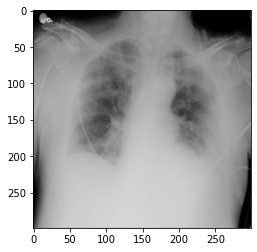

In [77]:
dir_path = 'Dataset1/testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+'//'+i, target_size = (299,299))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    print(val)

In [67]:
import tensorflow as tf
import tensorflow_federated as tff
import nest_asyncio
nest_asyncio.apply()

# Load simulation data.
source, _ = tff.simulation.datasets.emnist.load_data()
def client_data(n):
  return source.create_tf_dataset_for_client(source.client_ids[n]).map(
      lambda e: (tf.reshape(e['pixels'], [-1]), e['label'])
  ).repeat(10).batch(20)

# Pick a subset of client devices to participate in training.
train_data = [client_data(n) for n in range(3)]

# Wrap a Keras model for use with TFF.
def model_fn():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(10, tf.nn.softmax, input_shape=(784,),
                            kernel_initializer='zeros')
  ])
  return tff.learning.from_keras_model(
      model,
      input_spec=train_data[0].element_spec,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

# Simulate a few rounds of training with the selected client devices.
trainer = tff.learning.build_federated_averaging_process(
  model_fn,
  client_optimizer_fn=lambda: tf.keras.optimizers.SGD(0.1))
state = trainer.initialize()
for _ in range(5):
  state, metrics = trainer.next(state, train_data)
  print(metrics['train']['loss'])

11.5493555
11.707587
10.933915
10.228434
9.501166


In [68]:
import tensorflow as tf
import tensorflow_federated as tff
import nest_asyncio
nest_asyncio.apply()

In [69]:
emnist_train, emnist_test = tff.simulation.datasets.emnist.load_data()
def client_data(n):
  return emnist_train.create_tf_dataset_for_client(source.client_ids[n]).map(
      lambda e: (tf.reshape(e['pixels'], [-1]), e['label'])
  ).repeat(10).batch(20)

In [70]:
train_data = [client_data(n) for n in range(3)]

trainer = tff.learning.build_federated_averaging_process(
  model_fn,
  client_optimizer_fn=lambda: tf.keras.optimizers.SGD(0.1))
state = trainer.initialize()
for _ in range(5):
  state, metrics = trainer.next(state, train_data)
  print(metrics['train']['loss'])

11.5493555
11.693433
11.125897
9.973322
9.198745
